# Assignment #4 - Reinforcement Learning



<font color="blue"> Alekhya Majeti (801135655)</font>

# I. Overview

The Objective of this assignment is to implement reinforcement learning algorithm for Rummy game. By understanding the rummy game, its environment and train the RL agent or Q learning. Following are the steps going in this assignment.

 - Create a model for the problem i.e. Rummy
 - Experiment the model with various parameters
 - Explained the choice of the slected parameters
 - Chose the parameter which gave the optimal results and also, used for final training
 - visualized the results and they are explained

# II. Problems 



## Rummy (Our Way)
![](https://upload.wikimedia.org/wikipedia/commons/9/9a/3_playing_cards.jpg)



### Description:
Rummy is mostly played by 4 players where each player get 10 cards and rest of placed as closed deck.  

But for this assignment to keep it simple, we have changed some rules, reduced the deck of cards and distribution of the cards among each player. Otherwise, the our Q table would be large to handle on our local machines.  

So in this game each player will get 3 cards randomly from 'A' to '5'. With each turn you have to pick a card either from the pile of closed or open cards depending on the cards you have. After that you have to select a card to drop to the pile from your deck. Your goal is to make all of your 3 cards of same number. As soon as one player reaches the goal state, it will meld the cards and game will stop and all other player will get score as the sum of their cards in hand. Player with minimum score will win the game.  

Each player will play for the 10 rounds and if nobody reach to the meld stage then each will player will get score equivalent to the sum of their cards in hand.

Player with the lowest score wins the game.



### <font color="red"> Game Introduction and Rules: </font>

You can only till max turns which is now 20. If you are able to meld your cards, you win otherwise you lose points as per your stash score.

Lets Simulate a Game Round :
The Goal of this game is to collect cards with the same rank.
Naming Conventions to follow H : Hearts, S : Spades, D : Diamonds, C : Clubs. Stash/Hand are the cards which you have. Stash/Hand Score: The sum of the rank of cards. 

- On the first turn you will be given 3 cards from the randomly shuffled deck. Eg: 3H, 2S, AD. Stash Score: 6
- In the next step you will have to either pick a card from pile or the deck. On the first turn, the top card of the deck is on the pile. The card on the pile is visible to you. So Card on the Pile : 2D . You have to decide whether you have to pick this card or you have to pick from pile. Since you alread
- Following the pickup step, you will have to drop one card from the stash/hand. Your Hand : 3H, 2S, AD, 2D
- You can drop any of these cards, but remember if you drop 2S or 2D you might not be able to make a series. So you have to decide whether to drop 3H or AD. Since there are maximum 20 turns, you have to keep your score low as well, Higher the score the higher points you lose. So you decide to drop 3H. Your hand/stash will be: 2S, 2D, AD
- Your opponent will play his hand, he/she shall pick up a card from a pile or deck and the drop a card to the pile.
- Now its your turn. The card on the Pile : 5H. Since picking up this card won't help you much. You decide to pick a card from the Deck. You get lucky, you get a 2C card. Your hand now is 2S, 2D, 2C, AD. Hurray! You can now meld these cards and drop the last card to make your score 0.
- You win this round. Your opponent Stash/Hand score : 15. So you are at 0 points and your opponent is at 15 points. You are ahead of him since you have to keep your score as low as possible.


## Rummy Environment

Importing Libraries

In [1]:
import random 
from functools import reduce
from collections import defaultdict
import numpy as np
from copy import copy
%matplotlib inline

Here, we define the SUITS, RANKS of the cards and their RANK_VALUE.

In [2]:
SUIT = ['H','S','D','C']
RANK = ['A', '2', '3', '4', '5','6','7']
RANK_VALUE = {'A': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'T': 10, 'Q': 10, 'K': 10}

## Card Class Definition
__init__  : Defines the card details such as rank, suit and calculates the rank value


In [3]:
class Card :
    def __init__(self,rank,suit):
        self.rank = rank
        self.suit = suit
        self.rank_to_val = RANK_VALUE[self.rank]
    
    def __str__(self):
        return f'{self.rank}{self.suit}'

    def __repr__(self):
        return f'{self.rank}{self.suit}'

    
    def __eq__(self,other):
        return self.rank == other.rank and self.suit == other.suit
  
# Deck class contains some basic operations performed with the cards:
# 1. Shuffling the cards.
# 2. Drawing card from the deck.

## Deck Class Definition
__shuffle__ : Shuffles the deck in random order

__draw_card__ : Draws a card from the top of the deck

In [4]:
class Deck:
    def __init__(self,packs):
        self.packs = packs
        self.cards = []
        for pack in range(0,packs) :
            for suit in SUIT :
                for rank in RANK :
                    self.cards.append(Card(rank,suit))
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        card = self.cards[0]
        self.cards.pop(0)
        return card

## Player Class:

### 1.__init__(self,name,stash=list(),isBot=False): 
Initializing stash, name, isBot/dealer points for each player.

### 2. deal_card(self,card):
This method appends the card in the stash and check the condition that length of stash should not be greater than nuber of cards length in game.

### 3. drop_card(self,card):
This method removes the card from stash and add that card into pile.

### 4. meld(self):
This method tries to find the cards with the same rank in the hand. If it finds then it will merge the cards in the hand to the melded cards array in the game. 

### 5. stash_score(self):
This method calculates sum of all the cards in stash according to the rank of each card.

### 6. get_info(self,debug):
This function fetch all the information of the player.

In [5]:
class Player:
  
    """  
        Player class to create a player object.
        eg: player = Player("player1", list(), isBot = False)
        Above declaration will be for your agent.
        All the player names should be unique or else you will get error.
        
    """

    def __init__(self,name,stash=list(),isBot=False,points=0,conn=None):
        self.stash = stash
        self.name = name
        self.game = None
        self.isBot = isBot
        self.points = points
        self.conn = conn
        
    def deal_card(self,card):
        try :
            self.stash.append(card)
            if len(stash) > self.game.cardsLength + 1 :
                raise ValueError('Cannot have cards greater than ')
        except ValueError as err:
            print(err.args)
            
    def drop_card(self,card):
        self.stash.remove(card)
        self.game.add_pile(card)
        return -1

    
    def meld(self):
        card_hash = defaultdict(list)
        for card in self.stash:
            card_hash[card.rank].append(card)
        melded_card_ranks = []
        for (card_rank,meld_cards) in card_hash.items():
            if len(meld_cards) >= 3 :
                self.game.meld.append(meld_cards)
                melded_card_ranks.append(card_rank)
                for card in meld_cards:
                    self.stash.remove(card)
        
        for card_rank in melded_card_ranks :
            card_hash.pop(card_rank)
        return len(melded_card_ranks) > 0

    def stash_score(self) :
        score = 0
        for card in self.stash :
            score += RANK_VALUE[card.rank]
        return score
    
    def get_info(self,debug):
        if debug :
            print(f'Player Name : {self.name} \n Stash Score: {self.stash_score()} \n Stash : {", ".join(str(x) for x in self.stash)}')
        card_ranks = []
        card_suits = []
        pileset = None
        pile = None
        for card in self.stash :
            card_suits.append(RANK_VALUE[card.rank])
            card_ranks.append(card.suit)
        if len(self.game.pile) > 0 : 
            return {"Stash Score" : self.stash_score(), "CardSuit":  card_suits, "CardRanks": card_ranks, "PileRank": self.game.pile[-1].rank, "PileSuit":self.game.pile[-1].suit}
        return {"Stash Score" : self.stash_score(), "CardSuit":  card_suits, "CardRanks": card_ranks}


## Game Enviroment:

### 1. __init():  

### 2. add_pile(self, card):  This method takes a card as argument and first checks number of cards in the deck. If its is ‘0’ then add the cards from file to deck and append the passed card to the pile.

### 3. pick_card(self, player, action):  This methods helps player picking up the card from either Pile or Deck based on action.
			We have defined, If action = 0 then, player will pick a card from Pile
			And if action. = 1 then player will pick card from Deck. 
			Meld condition will be check after player picks the card, if the meld condition satisfied, player won. 
            You can modify the rewards in return, only the values

### 4. pick_from_pile(self, player): This method helps player picking card from the pile and simultaneously a card from pile gets reduced.

### 5. pick_from_deck(self, player): This method is similar to above method but it helps picking up card from the Deck. 

### 6. get_player(self, player_name): This function fetch the details of the player given player_name.

### 7. computer_play(self, player): This method defines the play of the computer/Dealer in following sequence:
			--> Randomly taking actions from picking up card from deck/pile.
			--> Checking the meld condition afterwards.
			--> If the meld condition does not satisfied, remove the card from his stash.

### 8. play(self): This method defines all the function city of play for the player:
		  --> Decrementing the maximum number of turns defined per game.
		  --> For each player, it will check the 'stash', if the 'Stash' for any player = 0 (That player won), it will add the value of each card in stash for all other players.
		  --> Or If maximum number of turns in each round becomes 0, it will add the card values in stash for all the players and return.
      
### 9. drop_card(self,player,card) This method drops a card from the player given player object and card object and returns the reward associated with it.

      --> You can modify the rewards which gets returned in the value.


### 9. reset(self, players): This method will reinitialize all the deck, pile and players.

### 10. _update_turn(self): This method is used to count the number of turns in the game.

In [6]:
class RummyAgent() :
    """
    Simple Rummy Environment
    
    Simple Rummy is a game where you need to make all the cards in your hand same before your opponent does.
    Here you are given 3 cards in your hand/stash to play.
    For the first move you have to pick a card from the deck or from the pile. 
    The card in deck would be random but you can see the card from the pile.
    In the next move you will have to drop a card from your hand.
    Your goal is to collect all the cards of the same rank. 
    Higher the rank of the card, the higher points you lose in the game. 
    You need to keep the stash score low. Eg, if you can AH,7S,5D your strategy would be to either find the first pair of the card or by removing the highest card in the deck.
    You only have 20 turns to either win the same or collect low scoring card.
    You can't see other players cards or their stash scores.
    
    Parameters
    ====
    players: Player objects which will play the game.
    max_card_length : Number of cards each player can have
    max_turns: Number of turns in a rummy game
    """

    def __init__(self,players,max_card_length=5,max_turns=20) :
        self.max_card_length = max_card_length
        self.max_turns = max_turns
        self.reset(players)
        
    def update_player_cards(self,players):
        for player in players :
            player = Player(player.name,list(),isBot=player.isBot,points=player.points,conn=player.conn)
            stash = []
            for i in range(self.max_card_length):
                player.stash.append(self.deck.draw_card())
            player.game = self
            self.players.append(player)
        self.pile = [self.deck.draw_card()]

    def add_pile(self,card):
        if len(self.deck.cards) == 0 :
            self.deck.cards.extend(self.pile)
            self.deck.shuffle()
            self.pile = []
        self.pile.append(card)
        
        
    def pick_card(self,player,action):
        if action == 0:
            self.pick_from_pile(player)
        else :
            self.pick_from_deck(player)
        if player.meld() :
            return {"reward" : 10}
        else :
            return {"reward" : -1}
#             return -player.stash_score()
       
    def pick_from_pile(self,player):
        card = self.pile[-1]
        self.pile.pop()
        return player.stash.append(card)
     
    def pick_from_deck(self,player):
        return player.stash.append(self.deck.draw_card())
    
    def get_player(self,player_name):
        return_player = [player for player in self.players if player.name == player_name]
        if len(return_player) != 1:
            print("Invalid Player")
            return None
        else:
            return return_player[0]
    
    def drop_card(self,player,card):
        player.drop_card(card)
        return {"reward" : -1}
    
  
    def computer_play(self,player):
        #Gets a card from deck or pile
        if random.randint(0,1) == 1 :
            self.pick_from_pile(player)
        else :
            self.pick_from_deck(player)
            
        #tries to meld if it can
#         if random.randint(0,10) > 5 :
        player.meld()
        
        #removes a card from the stash
        if len(player.stash) != 0:
            card = player.stash[(random.randint(0,len(player.stash) - 1))]
            player.drop_card(card)
        
    def play(self):
        for player in self.players :
            if len(player.stash) == 0 :
                return True
        if self.max_turns <= 0 :
            return True
        return False

    def _update_turn(self):
        self.max_turns -= 1  
    
    def reset(self,players,max_turns=20):
        self.players = []
        self.deck = Deck(1)
        self.deck.shuffle()
        self.meld = []
        self.pile = []
        self.max_turns = max_turns
        self.update_player_cards(players)




### Example Run with Random Players

This following code shows how to create an environment and players to play 10 games with 20 maximum rounds. This only includes random picking up of card and dropping.  

In [7]:
p1 = Player('tabish',list())
p2 = Player('comp1',list(),isBot=True)
rummy = RummyAgent([p1,p2],max_card_length=3,max_turns=11)

In [8]:
maxiter = 3
debug = True
for j in range(maxiter):
        for player in rummy.players :
            player.points = player.stash_score()
        
        rummy.reset(rummy.players)
        random.shuffle(rummy.players)
        # int i = 0 
        if debug :
            print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
        while not rummy.play() :    
            rummy._update_turn()
            print(rummy.max_turns)       
            for player in rummy.players:
                if player.isBot :
                    if rummy.play():
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    rummy.computer_play(player)
                    if debug :
                        player.get_info(debug)
                        if player.stash == 0 :
                            print(f'{player.name} wins the round')

                else :
                    if rummy.play() :
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    player_info = player.get_info(debug)
                    action_taken = np.random.choice(1)
                    if debug :
                        print(f'Card in pile {player_info["PileSuit"]}{player_info["PileRank"]}')
                    result_1 = rummy.pick_card(player,action_taken)
                    result_1 = result_1["reward"]

                    if debug : 
                        print(f'{player.name} takes action {action_taken}')
                    #player stash will have no cards if the player has melded them 
                    #When you have picked up a card and you have drop it since the remaining cards have been melded. 
                    if len(player.stash) == 1:
                        rummy.drop_card(player,player.stash[0])
                        if debug :
                            print(f'{player.name} Wins the round')

                    elif len(player.stash) != 0 :

                        player_info = player.get_info(debug)
                        s = player_info['CardRanks']
                        action_taken = np.random.choice(4)
                        card = player.stash[action_taken]
                        if debug :
                            print(f'{player.name} drops card {card}')

                        result_1 = rummy.drop_card(player,card)
                        result_1 = result_1["reward"]
#                             pdb.set_trace()
                    else :
                        if debug :
                            print(f'{player.name} Wins the round')
                    if debug :
                        player.get_info(debug)
        


**********************************
		Game Starts : 0
***********************************
19
tabish Plays
Player Name : tabish 
 Stash Score: 11 
 Stash : 2S, 7C, 2C
Card in pile S3
tabish takes action 0
Player Name : tabish 
 Stash Score: 14 
 Stash : 2S, 7C, 2C, 3S
tabish drops card 7C
Player Name : tabish 
 Stash Score: 7 
 Stash : 2S, 2C, 3S
comp1 Plays
Player Name : comp1 
 Stash Score: 7 
 Stash : AH, 5H, AC
18
tabish Plays
Player Name : tabish 
 Stash Score: 7 
 Stash : 2S, 2C, 3S
Card in pile D7
tabish takes action 0
Player Name : tabish 
 Stash Score: 14 
 Stash : 2S, 2C, 3S, 7D
tabish drops card 3S
Player Name : tabish 
 Stash Score: 11 
 Stash : 2S, 2C, 7D
comp1 Plays
Player Name : comp1 
 Stash Score: 7 
 Stash : AH, 5H, AC
17
tabish Plays
Player Name : tabish 
 Stash Score: 11 
 Stash : 2S, 2C, 7D
Card in pile D5
tabish takes action 0
Player Name : tabish 
 Stash Score: 16 
 Stash : 2S, 2C, 7D, 5D
tabish drops card 2S
Player Name : tabish 
 Stash Score: 14 
 Stash : 2C, 7D,

# III. Methods

- Decide your TD learning approach: SARSA or Q-learning?
- Decide your function approximator.
- Describe your approach and the reason why you select it.
- Finish epsilon_greedy function and other TODOs. Explain it.
- Explain your codes.

## Sarsa and Q-learning

Both SARSA and Q-learning are temporal difference learning approaches. The way they are approaching the Q table is the main difference between them.

In Q learning there is no assumption making for the behaviour policy. The table is updated by exploring other policies. So this called an off-policy control or Q-learning.

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

In SARSA, the Q is updtaed with assumptions of behaviour policy. 

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$


In these two formulas Q table is updated and we can see that in SARSA, it is using the action that gives to s(t+1) to update action at s(t) whereas in Q learning the maximum reward action value at s(t+1) to update action at s(t).



### TD Learning approach: SARSA or Q-learning 

I'm choosing SARSA over Q-learning for this problem because Q-learning learns from the optimal strategy but also this method is dependant on a data generated in the training part, so this greatly effects on the sample data. So, this is hugely affected by the training data. 

I used Temporal Difference Learning as this is more flexible when compared to others and also its learning ability is stronger. Also, the other main point is this can be done without a long number of states. So that is why this is better for solving problems. TD comproses of the forward and bacward knowledge this is equal to difference in w. 


### Function approximator

As the final method that I've finalised for this problem is Q learning, the function approximator used is the following:

pi(s) = argmax(Q)*(s,a)

Using Q-values with function approximator, we need to find features that are funcitons of states and actions. In function approximation agent will choose max of state, action pair from our look up table.




## RLAgent for Rummy

Referencing the RLAgent in the lecture note, make your own agent class for the game. 

In [9]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
class RLAgent:
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation

    """
    def __init__(self):
        self.n_a = 8
        self.size= 7
        self.Q = np.zeros((7, 7, 7, 8))
        self.Q[...] = 0
        for i in range(self.size):
            self.Q[i,i,i,:]=10

    def epsilon_greed(self, epsilon, s):
        if np.random.uniform() < epsilon:
            e_g = np.random.randint(self.n_a)
        else:
            get_max = np.where(self.Q[s[0],s[1],s[2], :] == np.max(self.Q[s[0],s[1],s[2],:]))[0]
            e_g = int(np.random.choice(get_max))
        return e_g

    def train(self,player, **params):
        self.player = player

        maxiter= params.pop('maxiter', 1)
        maxstep= params.pop('maxstep', 100)

        epsilon= params.pop('epsilon', 0.1)
        alpha = params.pop('alpha', 0.1)
        gamma = params.pop('gamma', 0.99)

        for j in range(maxiter):

            s=player.get_info(False)["CardSuit"]
            s=[x-1 for x in s]
            score=int(player.get_info(False)["Stash Score"])

            e_g = self.epsilon_greed(epsilon, s)
            awards = []
            for stride in range(maxstep):
                #Card selection action
                rum1=rummy.pick_card(self.player,e_g//4)["reward"]
                if len(self.player.stash)<=1:
                    self.Q[s[0], s[1],s[2], e_g]=self.Q[s[0], s[1],s[2], e_g]+alpha*(rum1+gamma*10-self.Q[s[0], s[1],s[2], e_g])
                    break
                #Folding action
                rum2=rummy.drop_card(self.player,self.player.stash[e_g%4])["reward"]

                r = rum1+rum2

                p1 = player.get_info(False)["CardSuit"]
                p1=[x-1 for x in p1]
                e_g1 = self.epsilon_greed(epsilon, p1)
                score1=int(player.get_info(False)["Stash Score"])
                r+=(score-score1)*0.5
                awards.append(r)
                self.Q[s[0], s[1],s[2], e_g]=self.Q[s[0], s[1],s[2], e_g]+alpha*(r+gamma*self.Q[p1[0], p1[1],p1[2], e_g1]-self.Q[s[0], s[1],s[2], e_g])
                if len(self.player.stash)<=1: # reached the goal
                    # ToDo: update Q table
                    self.Q[p1[0], p1[1], p1[2],:]=10
                    break
                s = p1
                e_g = e_g1
        return e_g//4,e_g%4,np.sum(awards),stride+1 # Return the action made

    def test(self,player, maxstep=1):
        self.player = player
        s=player.get_info(False)["CardSuit"]
        s=[x-1 for x in s]
        # selection an action
        e_g = self.epsilon_greed(0, s)
        if len(self.player.stash)<=1:
            return 0,0
        # run simulation for max number of steps
        for stride in range(maxstep):
            rum1=rummy.pick_card(self.player,e_g//4)["reward"]
            rum2=0
            if len(self.player.stash)==4:
                rum2=rummy.drop_card(self.player,self.player.stash[e_g%4])["reward"]
            r = rum1+rum2
            p1 = player.get_info(False)["CardSuit"]
            if len(p1)<3:
                return 0,0
            p1=[x-1 for x in p1]
            e_g1 = self.epsilon_greed(0, p1)
            if self.player.stash==0:
                break

        return  e_g//4,e_g%4          


In [26]:
def plot_train_rummy(agent, rtrace, steps):

    fig = plt.figure(figsize=(9,7))
    ax = fig.add_subplot(321)
    plt.plot(rtrace)
    plt.ylabel("total rewards")

    ax1 = fig.add_subplot(322)
    plt.plot(steps)
    plt.ylabel("# steps")


## Result

Parameters : epsilon=0.1, alpha=0.1, gamma=0.99

The AF is 0.99

In [12]:
# Simulation training
maxiter = 10000
debug = False
agent=RLAgent()
p1 = Player('tabish',list())
p2 = Player('comp1',list(),isBot=True)
rummy = RummyAgent([p1,p2],max_card_length=3,max_turns=20)
rtrace = []
steps = []
for j in range(maxiter):
        for player in rummy.players :
            player.points = player.stash_score()
        
        rummy.reset(rummy.players)
        random.shuffle(rummy.players)
        # int i = 0 
        if debug :
            print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
        while not rummy.play() :    
            rummy._update_turn()     
            for player in rummy.players:
                if player.isBot :
                    if rummy.play():
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    rummy.computer_play(player)
                    if debug :
                        player.get_info(debug)
                        if player.stash == 0 :
                            print(f'{player.name} wins the round')
                            break

                else :
                    if rummy.play() :
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    player_info = player.get_info(debug)
                    taken,drop,rtrace_temp,steps_temp=agent.train(player,gamma=0.99,alpha=0.1,epsilon=0.1)
                    rtrace.append(rtrace_temp)
                    steps.append(steps_temp)
                    if debug:
                        print("action:",taken,"drop",drop)
                    if len(player.stash) <= 1:
                        if len(player.stash) == 1:
                            rummy.drop_card(player,player.stash[0])
                       
                        if debug :
                            print(f'{player.name} Wins the round')
                            break
                    if debug :
                        player.get_info(debug)

print("finish train")

finish train


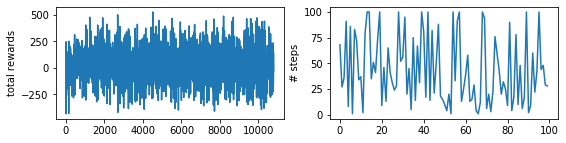

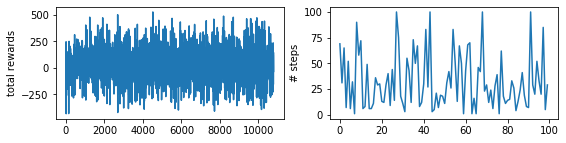

In [28]:
# visualization
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plot_train_rummy(agent, rtrace, steps[0:100])
plot_train_rummy(agent, rtrace, steps[100:200])

## Winning Percentage

In [14]:
maxiter = 10000
debug = False
player1 = Player('tabish',list())
player2 = Player('comp1',list(),isBot=True)
rummy = RummyAgent([player1,player2],max_card_length=3,max_turns=20)
player_numer_win=0
for j in range(maxiter):
        for player in rummy.players :
            player.points = player.stash_score()
        
        rummy.reset(rummy.players)
        random.shuffle(rummy.players)
        if debug :
            print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
        while not rummy.play() :    
            rummy._update_turn()     
            for player in rummy.players:
                if player.isBot :
                    if rummy.play():
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    rummy.computer_play(player)
                    if debug :
                        player.get_info(debug)
                        if player.stash == 0 :
                            print(f'{player.name} wins the round')
                            break

                else :
                    if rummy.play() :
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    player_info = player.get_info(debug)
                    taken,drop=agent.test(player)
                    if debug:
                        print("action:",taken,"drop",drop)
                    if len(player.stash) <= 1:
                        if len(player.stash) == 1:
                            rummy.drop_card(player,player.stash[0])
                       
                        if debug :
                            print(f'{player.name} Wins the round')
                            break
                    if debug :
                        player.get_info(debug)
        player2_score, player1_score=0,0
        for player in rummy.players :
            if player.isBot:
                player2_score=player.stash_score()
            else:
                player1_score=player.stash_score()
        if (player1_score<=player2_score):
            player_numer_win+=1 
print("player1 win",player_numer_win/maxiter)

player1 win 0.7423


### Model II

 - AF - 0.99
 - alpha - 0.1
 - exploring rate - 0


In [15]:
# Simulation training
maxiter = 10000
debug = False
agent=RLAgent()
p1 = Player('tabish',list())
p2 = Player('comp1',list(),isBot=True)
rummy = RummyAgent([p1,p2],max_card_length=3,max_turns=20)
rtrace = []
steps = []
for j in range(maxiter):
        for player in rummy.players :
            player.points = player.stash_score()
        
        rummy.reset(rummy.players)
        random.shuffle(rummy.players)
        # int i = 0 
        if debug :
            print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
        while not rummy.play() :    
            rummy._update_turn()     
            for player in rummy.players:
                if player.isBot :
                    if rummy.play():
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    rummy.computer_play(player)
                    if debug :
                        player.get_info(debug)
                        if player.stash == 0 :
                            print(f'{player.name} wins the round')
                            break

                else :
                    if rummy.play() :
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    player_info = player.get_info(debug)
                    taken,drop,rtrace_temp,steps_temp=agent.train(player,gamma=0.99,alpha=0.1,epsilon=0)
                    rtrace.append(rtrace_temp)
                    steps.append(steps_temp)
                    if debug:
                        print("action:",taken,"drop",drop)
                    if len(player.stash) <= 1:
                        if len(player.stash) == 1:
                            rummy.drop_card(player,player.stash[0])
                       
                        if debug :
                            print(f'{player.name} Wins the round')
                            break
                    if debug :
                        player.get_info(debug)
print("finish train")

finish train


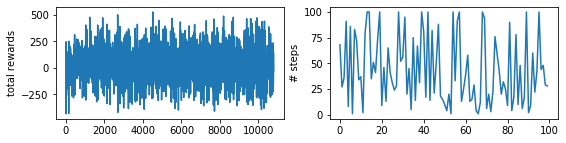

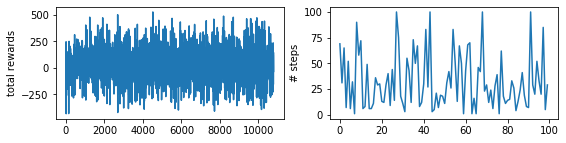

In [29]:
plot_train_rummy(agent, rtrace, steps[0:100])
plot_train_rummy(agent, rtrace, steps[100:200])

In [17]:
maxiter = 10000
debug = False
player1 = Player('tabish',list())
player2 = Player('comp1',list(),isBot=True)
rummy = RummyAgent([player1,player2],max_card_length=3,max_turns=20)
player_numer_win=0
for j in range(maxiter):
        for player in rummy.players :
            player.points = player.stash_score()
        
        rummy.reset(rummy.players)
        random.shuffle(rummy.players)
        if debug :
            print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
        while not rummy.play() :    
            rummy._update_turn()     
            for player in rummy.players:
                if player.isBot :
                    if rummy.play():
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    rummy.computer_play(player)
                    if debug :
                        player.get_info(debug)
                        if player.stash == 0 :
                            print(f'{player.name} wins the round')
                            break

                else :
                    if rummy.play() :
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    player_info = player.get_info(debug)
                    taken,drop=agent.test(player)
                    if debug:
                        print("action:",taken,"drop",drop)
                    if len(player.stash) <= 1:
                        if len(player.stash) == 1:
                            rummy.drop_card(player,player.stash[0])
                       
                        if debug :
                            print(f'{player.name} Wins the round')
                            break
                    if debug :
                        player.get_info(debug)
        player2_score, player1_score=0,0
        for player in rummy.players :
            if player.isBot:
                player2_score=player.stash_score()
            else:
                player1_score=player.stash_score()
        if (player1_score<=player2_score):
            player_numer_win+=1 
print("player1 win",player_numer_win/maxiter)

player1 win 0.6816


### Model III

 - AF - 0.5
 - learning rate - 0.1
 - exploration rate - 0.1
 

In [18]:
# Simulation training
maxiter = 10000
debug = False
agent=RLAgent()
p1 = Player('tabish',list())
p2 = Player('comp1',list(),isBot=True)
rummy = RummyAgent([p1,p2],max_card_length=3,max_turns=20)
rtrace = []
steps = []
for j in range(maxiter):
        for player in rummy.players :
            player.points = player.stash_score()
        
        rummy.reset(rummy.players)
        random.shuffle(rummy.players)
        # int i = 0 
        if debug :
            print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
        while not rummy.play() :    
            rummy._update_turn()     
            for player in rummy.players:
                if player.isBot :
                    if rummy.play():
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    rummy.computer_play(player)
                    if debug :
                        player.get_info(debug)
                        if player.stash == 0 :
                            print(f'{player.name} wins the round')
                            break

                else :
                    if rummy.play() :
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    player_info = player.get_info(debug)
                    taken,drop,rtrace_temp,steps_temp=agent.train(player,gamma=0.5,alpha=0.1,epsilon=0.1)
                    rtrace.append(rtrace_temp)
                    steps.append(steps_temp)
                    if debug:
                        print("action:",taken,"drop",drop)
                    if len(player.stash) <= 1:
                        if len(player.stash) == 1:
                            rummy.drop_card(player,player.stash[0])
                       
                        if debug :
                            print(f'{player.name} Wins the round')
                            break
                    if debug :
                        player.get_info(debug)

print("finish train")

finish train


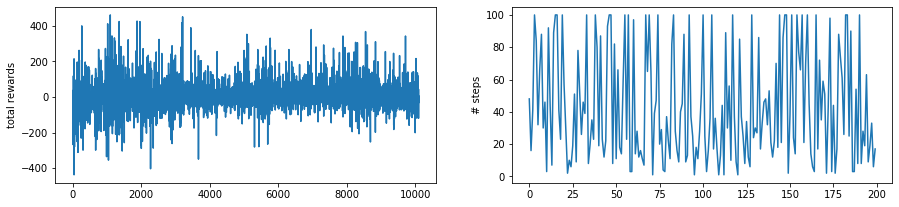

In [19]:
plot_train_rummy(agent, rtrace, steps[0:200])

In [20]:
maxiter = 10000
debug = False
player1 = Player('tabish',list())
player2 = Player('comp1',list(),isBot=True)
rummy = RummyAgent([player1,player2],max_card_length=3,max_turns=20)
player_numer_win=0
for j in range(maxiter):
        for player in rummy.players :
            player.points = player.stash_score()
        
        rummy.reset(rummy.players)
        random.shuffle(rummy.players)
        if debug :
            print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
        while not rummy.play() :    
            rummy._update_turn()     
            for player in rummy.players:
                if player.isBot :
                    if rummy.play():
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    rummy.computer_play(player)
                    if debug :
                        player.get_info(debug)
                        if player.stash == 0 :
                            print(f'{player.name} wins the round')
                            break

                else :
                    if rummy.play() :
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    player_info = player.get_info(debug)
                    taken,drop=agent.test(player)
                    if debug:
                        print("action:",taken,"drop",drop)
                    if len(player.stash) <= 1:
                        if len(player.stash) == 1:
                            rummy.drop_card(player,player.stash[0])
                       
                        if debug :
                            print(f'{player.name} Wins the round')
                            break
                    if debug :
                        player.get_info(debug)
        player2_score, player1_score=0,0
        for player in rummy.players :
            if player.isBot:
                player2_score=player.stash_score()
            else:
                player1_score=player.stash_score()
        if (player1_score<=player2_score):
            player_numer_win+=1 
print("player1 win",player_numer_win/maxiter)

player1 win 0.7206


### Model IV

 - AF - 0.99
 - Learning rate - 0.3
 - Exploration rate - 0.1

In [21]:
# Simulation training
maxiter = 10000
debug = False
agent=RLAgent()
p1 = Player('tabish',list())
p2 = Player('comp1',list(),isBot=True)
rummy = RummyAgent([p1,p2],max_card_length=3,max_turns=20)
rtrace = []
steps = []
for j in range(maxiter):
        for player in rummy.players :
            player.points = player.stash_score()
        
        rummy.reset(rummy.players)
        random.shuffle(rummy.players)
        # int i = 0 
        if debug :
            print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
        while not rummy.play() :    
            rummy._update_turn()     
            for player in rummy.players:
                if player.isBot :
                    if rummy.play():
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    rummy.computer_play(player)
                    if debug :
                        player.get_info(debug)
                        if player.stash == 0 :
                            print(f'{player.name} wins the round')
                            break

                else :
                    if rummy.play() :
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    player_info = player.get_info(debug)
                    taken,drop,rtrace_temp,steps_temp=agent.train(player,gamma=0.99,alpha=0.3,epsilon=0.1)
                    rtrace.append(rtrace_temp)
                    steps.append(steps_temp)
                    if debug:
                        print("action:",taken,"drop",drop)
                    if len(player.stash) <= 1:
                        if len(player.stash) == 1:
                            rummy.drop_card(player,player.stash[0])
                       
                        if debug :
                            print(f'{player.name} Wins the round')
                            break
                    if debug :
                        player.get_info(debug)
print("finish train")

finish train


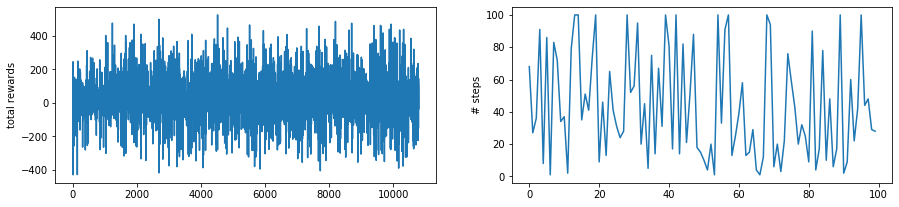

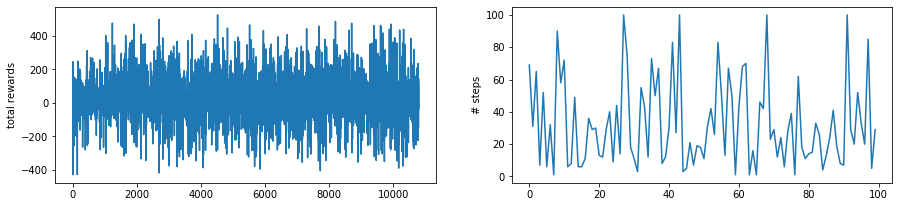

In [22]:
plot_train_rummy(agent, rtrace, steps[0:100])
plot_train_rummy(agent, rtrace, steps[100:200])

In [23]:
maxiter = 10000
debug = False
player1 = Player('tabish',list())
player2 = Player('comp1',list(),isBot=True)
rummy = RummyAgent([player1,player2],max_card_length=3,max_turns=20)
player_numer_win=0
for j in range(maxiter):
        for player in rummy.players :
            player.points = player.stash_score()
        
        rummy.reset(rummy.players)
        random.shuffle(rummy.players)
        if debug :
            print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
        while not rummy.play() :    
            rummy._update_turn()     
            for player in rummy.players:
                if player.isBot :
                    if rummy.play():
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    rummy.computer_play(player)
                    if debug :
                        player.get_info(debug)
                        if player.stash == 0 :
                            print(f'{player.name} wins the round')
                            break

                else :
                    if rummy.play() :
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    player_info = player.get_info(debug)
                    taken,drop=agent.test(player)
                    if debug:
                        print("action:",taken,"drop",drop)
                    if len(player.stash) <= 1:
                        if len(player.stash) == 1:
                            rummy.drop_card(player,player.stash[0])
                       
                        if debug :
                            print(f'{player.name} Wins the round')
                            break
                    if debug :
                        player.get_info(debug)
        player2_score, player1_score=0,0
        for player in rummy.players :
            if player.isBot:
                player2_score=player.stash_score()
            else:
                player1_score=player.stash_score()
        if (player1_score<=player2_score):
            player_numer_win+=1 
print("player1 win",player_numer_win/maxiter)

player1 win 0.7385


### Analysis

 - From the models above and their accuracy rates it is clear that model 1 is better. Model 2 has the least accuracy rate. 

 - Between model 3 and model 1, model 1 better as the accuracy of former is better than the latter
 
 - Between model 4 and model 1 the learning rate of the former is grater than the latter and also model 1 is better so we can deduce that learning rate has an effect on this model.
 

## Conclusions

From this assignment I had a complete understanding of the basics of reinforcement learning. 

State, Action, Rewards, attenuation factor and exploration rate are the parameters involved in this type of learning. 

The best way to simplify the complexity of reinforcement learning is to introduce markov properties. 

The main problems of the reinforcement learning are predicting the problem and control problems.

The time-series differential TD method is generally used to solve the prediction problem. 

# Extra Credit for Tournament Top16!

- In two classes, we will have qualification and tournament.
- To participate the tournament, you need to use this [client](http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/StudentClient.ipynb) codes.
- Locally you can run the [server](http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/SERVER.ipynb) to verify your run. 

### Qualification Round 

- In qualification game, individual will play against a fixed policy agent on the server
  - You can access the server: TBA
  
  - Highly ranked (by the profit) will proceed to the tournament.
  - max. 32 players will be cut for main tournament (by 11 pm on Dec 1st).
  
### Tournament

- In tournament, 4 players will be play in each round.
  - In a table game, two best scoring players will proceed to next round
  - In final, the game will ends in 50 rounds and winner will be the one with lowest balance. 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
35 | Methods | 
 |10| Review of the SARSA and Q-Learning
 | 5| Choice of TD learning and Reason
 | 5| Choice of Function Approximation and Reason
 |10| Implementation of the selected approach (RLAgent)
 | 5| explanation of the codes
45 | Results 
 |10| Reports the selected parameters 
 |15| Experimental outputs that show the choice of parameters. How do you choose them?
 |10| Output plots (5 for each)
 |10| reading and analysis of learning results and plots
10 | Participation to the tournament.
5 | Conclusions 
